This notebook reads in SLC dates and plots temporal baseline for subsequent SLCs.

This notebook was organized on 9-26-22

***

Import things. Use conda environment oliviaJupyter.


In [1]:
import os,sys
import glob
import pandas
import datetime 
from dateutil import parser
from datetime import date, datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  widget

Define working directory and crop directory

In [8]:
workdir = '/data/ocp4/LagunaSalada/Data_and_Figs/'
#cropdir='cropped_9000_20_10000_1780/'
cropdir='cropped_9000_1800_18000_3600/'

Load in the dates from file names. Calculate # days between acquisitions.

In [10]:
dates = [os.path.basename(x) for x in glob.glob(workdir+cropdir+"SLC_vv/2*")]
dates=sorted(dates)

# convert strings to datetime objects 
slc_dates=[]
for i in range(0,len(dates)):
    slc_dates.append(datetime.strptime(str(dates[i]).replace('\n',''), '%Y%m%d'))

# calculate dt between slcs 
dt = np.diff(slc_dates)

# convert to # of days 
dt2 = np.zeros(len(dt))
for i in range(0,len(dt)):
    dt2[i] = dt[i].days

Plot the # of days between acquisitions over time.

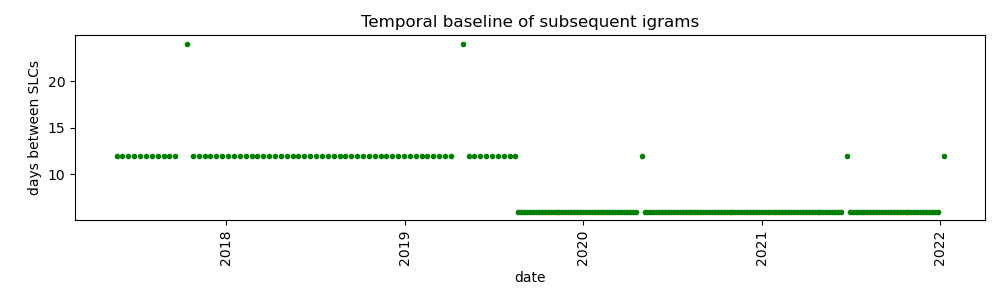

In [17]:
fig=plt.figure(figsize=(10,3), tight_layout=True)
plt.xticks(rotation = 90)
plt.plot(slc_dates[1::],dt2,'.g')
#plt.xlim([np.min(slc_dates), np.max(slc_dates)])
#plt.ylim([0, 16])
plt.xlabel('date')
plt.ylabel('days between SLCs')
plt.title('Temporal baseline of subsequent igrams')
plt.show()

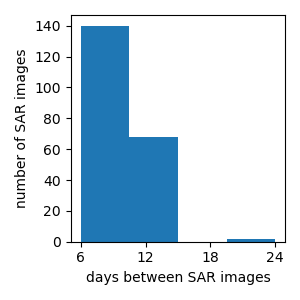

In [12]:
plt.figure(figsize=(3,3),tight_layout='TRUE')
plt.hist(dt2, bins=4); plt.xticks([6,12,18,24])
plt.xlabel('days between SAR images'); plt.ylabel('number of SAR images')
plt.show()
